# Portfolio Risk Analysis
This notebook demonstrates how to load historical stock prices, calculate daily returns, compute portfolio statistics (mean return, volatility, Sharpe ratio), and visualize portfolio performance.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

### Load Historical Stock Data
Download daily price data for a list of tickers.

In [2]:
def load_data(tickers, start="2020-01-01", end="2025-5-31"):
    """
    Download Adjusted Close price data for each ticker individually,
    return combined DataFrame.
    """
    all_data = {}
    for ticker in tickers:
        ticker_obj = yf.Ticker(ticker)
        hist = ticker_obj.history(start=start, end=end)
        # Use 'Adj Close' if available, else 'Close'
        if "Adj Close" in hist.columns:
            all_data[ticker] = hist["Adj Close"]
        else:
            all_data[ticker] = hist["Close"]
    df = pd.DataFrame(all_data)
    return df

tickers = [
    "AAPL", "MSFT", "GOOGL", "AMZN", "META",
    "TSLA", "NVDA", "JPM", "V", "UNH",
    "HD", "MA", "PG", "XOM", "LLY",
    "MRK", "PEP", "KO", "COST", "DIS"
    ]
df = load_data(tickers)

In [3]:
# Explore data
print(df.head())
print(df.describe())
print(df.info())

                                AAPL        MSFT      GOOGL       AMZN  \
Date                                                                     
2020-01-02 00:00:00-05:00  72.538513  152.791107  68.026024  94.900497   
2020-01-03 00:00:00-05:00  71.833282  150.888611  67.670151  93.748497   
2020-01-06 00:00:00-05:00  72.405663  151.278625  69.473846  95.143997   
2020-01-07 00:00:00-05:00  72.065140  149.899323  69.339645  95.343002   
2020-01-08 00:00:00-05:00  73.224426  152.286942  69.833183  94.598503   

                                 META       TSLA      NVDA         JPM  \
Date                                                                     
2020-01-02 00:00:00-05:00  208.635406  28.684000  5.971747  120.154694   
2020-01-03 00:00:00-05:00  207.531464  29.534000  5.876163  118.569069   
2020-01-06 00:00:00-05:00  211.440048  30.102667  5.900806  118.474792   
2020-01-07 00:00:00-05:00  211.897507  31.270666  5.972244  116.460678   
2020-01-08 00:00:00-05:00  214.045746

### Filter stock data

This section filters the data for days when Apple's stock price is above $250, counts the number of such days, and displays those days.

In [4]:

df_2023 = df["2023-01-01":"2023-12-31"]
aapl_above_250 = df.loc[df["AAPL"] > 250, ["AAPL"]]
count = len(aapl_above_250)
print(f"Number of days AAPL > $250: {count}")
aapl_above_250

Number of days AAPL > $250: 8


,AAPL
Date,
2024-12-16 00:00:00-05:00,250.151978
2024-12-17 00:00:00-05:00,252.583344
2024-12-20 00:00:00-05:00,253.589783
2024-12-23 00:00:00-05:00,254.367035
2024-12-24 00:00:00-05:00,257.286652
2024-12-26 00:00:00-05:00,258.103729
2024-12-27 00:00:00-05:00,254.685883
2024-12-30 00:00:00-05:00,251.307877


### Other Pandas Exercises
Explore more advanced pandas operations, such as rolling statistics, groupby, and resampling, to gain deeper insights into the stock data.

In [5]:
# 1. Calculate 20-day rolling mean and volatility for AAPL
rolling_mean = df['AAPL'].rolling(window=20).mean()
rolling_vol = df['AAPL'].rolling(window=20).std()

print('20-day Rolling Mean (AAPL):')
print(rolling_mean.tail())
print('\n20-day Rolling Volatility (AAPL):')
print(rolling_vol.tail())

20-day Rolling Mean (AAPL):
Date
2025-05-23 00:00:00-04:00    205.398667
2025-05-27 00:00:00-04:00    204.916475
2025-05-28 00:00:00-04:00    204.391400
2025-05-29 00:00:00-04:00    203.778510
2025-05-30 00:00:00-04:00    203.169669
Name: AAPL, dtype: float64

20-day Rolling Volatility (AAPL):
Date
2025-05-23 00:00:00-04:00    6.504480
2025-05-27 00:00:00-04:00    6.531937
2025-05-28 00:00:00-04:00    6.464778
2025-05-29 00:00:00-04:00    6.285941
2025-05-30 00:00:00-04:00    5.946800
Name: AAPL, dtype: float64


In [6]:
# 3. Group by year and calculate annual return for AAPL
aapl_annual_return = df['AAPL'].resample('YE').last().pct_change().dropna()
print('AAPL Annual Returns:')
print(aapl_annual_return)

AAPL Annual Returns:
Date
2021-12-31 00:00:00-05:00    0.346482
2022-12-31 00:00:00-05:00   -0.264042
2023-12-31 00:00:00-05:00    0.490081
2024-12-31 00:00:00-05:00    0.307052
2025-12-31 00:00:00-05:00   -0.196013
Freq: YE-DEC, Name: AAPL, dtype: float64


In [7]:
# 4. Find the date with the highest daily return for each stock
daily_returns = df.pct_change().dropna()
highest_return_dates = daily_returns.idxmax()
highest_returns = daily_returns.max()
print('Date with Highest Daily Return for Each Stock:')
for ticker in tickers:
    print(f"{ticker}: {highest_return_dates[ticker].date()} ({highest_returns[ticker]:.2%})")

Date with Highest Daily Return for Each Stock:
AAPL: 2025-04-09 (15.33%)
MSFT: 2020-03-13 (14.22%)
GOOGL: 2024-04-26 (10.22%)
AMZN: 2022-02-04 (13.54%)
META: 2023-02-02 (23.28%)
TSLA: 2025-04-09 (22.69%)
NVDA: 2023-05-25 (24.37%)
JPM: 2020-03-13 (18.01%)
V: 2020-03-24 (13.84%)
UNH: 2020-03-24 (12.80%)
HD: 2020-03-24 (13.75%)
MA: 2020-03-24 (16.61%)
PG: 2020-03-13 (12.01%)
XOM: 2020-03-24 (12.69%)
LLY: 2020-06-16 (15.68%)
MRK: 2021-10-01 (8.37%)
PEP: 2020-03-17 (12.94%)
KO: 2020-04-06 (6.48%)
COST: 2020-03-02 (9.96%)
DIS: 2020-03-24 (14.41%)


### Drawdown and Maximum Drawdown
This section calculates the drawdown for each stock, which measures the decline from a historical peak in cumulative returns. It also finds the maximum drawdown, representing the largest observed loss from a peak to a trough for each stock.

In [8]:
#Compute daily log returns for each stock.
returns = np.log(df / df.shift(1)).dropna()
returns.head()

,AAPL,MSFT,GOOGL,AMZN,META,TSLA,NVDA,JPM,V,UNH,HD,MA,PG,XOM,LLY,MRK,PEP,KO,COST,DIS
Date,,,,,,,,,,,,,,,,,,,,
2020-01-03 00:00:00-05:00,-0.009770,-0.012530,-0.005245,-0.012213,-0.005305,0.029203,-0.016136,-0.013284,-0.007985,-0.010171,-0.003329,-0.009804,-0.006748,-0.008072,-0.003333,-0.008620,-0.001400,-0.005471,0.000823,-0.011537
2020-01-06 00:00:00-05:00,0.007937,0.002581,0.026305,0.014776,0.018659,0.019072,0.004185,-0.000795,-0.002165,0.006918,0.004694,0.002659,0.001386,0.007649,0.003712,0.004265,0.003826,-0.000366,0.000274,-0.005819
2020-01-07 00:00:00-05:00,-0.004714,-0.009159,-0.001934,0.002089,0.002161,0.038067,0.012034,-0.017147,-0.002646,-0.006055,-0.006568,-0.003392,-0.006211,-0.008218,0.001888,-0.026987,-0.015843,-0.007712,-0.001577,0.000343
2020-01-08 00:00:00-05:00,0.015959,0.015803,0.007092,-0.007839,0.010087,0.048033,0.001874,0.007771,0.016973,0.020865,0.014853,0.017491,0.004253,-0.015195,0.009016,-0.006749,0.005136,0.001841,0.011399,-0.002061
2020-01-09 00:00:00-05:00,0.021018,0.012416,0.010443,0.004788,0.014209,-0.022189,0.010923,0.003645,0.006906,-0.005694,0.015214,0.013025,0.010879,0.007626,0.016393,0.008765,0.000668,0.018051,0.015923,-0.003928


In [9]:
 # Drawdown
def calculate_drawdown(series):
    cumulative = (1 + series).cumprod()
    peak = cumulative.cummax()
    drawdown = (cumulative - peak) / peak
    return drawdown
drawdowns = returns.apply(calculate_drawdown)
print("Maximum drawdown for each stock:")
print(drawdowns.min())

Maximum drawdown for each stock:
AAPL    -0.351789
MSFT    -0.406101
GOOGL   -0.479546
AMZN    -0.618939
META    -0.817506
TSLA    -0.798813
NVDA    -0.718677
JPM     -0.467463
V       -0.388694
UNH     -0.598545
HD      -0.416634
MA      -0.435134
PG      -0.255880
XOM     -0.582714
LLY     -0.296479
MRK     -0.456079
PEP     -0.325843
KO      -0.386012
COST    -0.325409
DIS     -0.655504
dtype: float64


### Portfolio Statistics
Calculate mean return, volatility, and Sharpe ratio for an equally weighted portfolio.

In [10]:
weights = np.array([1/len(tickers)] * len(tickers))
portfolio_returns = returns.dot(weights)
mean_return = portfolio_returns.mean() * 252
volatility = portfolio_returns.std() * np.sqrt(252)
sharpe_ratio = mean_return / volatility
print(f'Mean Return: {mean_return:.2%}')
print(f'Volatility: {volatility:.2%}')
print(f'Sharpe Ratio: {sharpe_ratio:.2f}')

Mean Return: 16.71%
Volatility: 21.93%
Sharpe Ratio: 0.76


In [11]:
# Optimize portfolio weights for maximum Sharpe ratio
from scipy.optimize import minimize

# Objective: negative Sharpe ratio (since we minimize)
def neg_sharpe(weights, returns):
    port_ret = np.dot(returns.mean(), weights) * 252
    port_vol = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))
    return -port_ret / port_vol

# Constraints: weights sum to 1, all weights >= 0
num_assets = len(tickers)
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bounds = tuple((0, 1) for _ in range(num_assets))
init_guess = num_assets * [1. / num_assets]

opt_result = minimize(neg_sharpe, init_guess, args=(returns,), method='SLSQP', bounds=bounds, constraints=constraints)
opt_weights = opt_result.x

# Calculate optimized portfolio statistics
opt_portfolio_returns = returns.dot(opt_weights)
opt_mean_return = opt_portfolio_returns.mean() * 252
opt_volatility = opt_portfolio_returns.std() * np.sqrt(252)
opt_sharpe = opt_mean_return / opt_volatility

print("\nOptimized Portfolio (Max Sharpe Ratio):")
print(f"Mean Return: {opt_mean_return:.2%}")
print(f"Volatility: {opt_volatility:.2%}")
print(f"Sharpe Ratio: {opt_sharpe:.2f}")
print("Optimized Weights:")
for ticker, weight in zip(tickers, opt_weights):
    print(f"{ticker}: {weight:.2%}")

print("\nEqual Weight Portfolio:")
print(f"Mean Return: {mean_return:.2%}")
print(f"Volatility: {volatility:.2%}")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")


Optimized Portfolio (Max Sharpe Ratio):
Mean Return: 35.98%
Volatility: 26.34%
Sharpe Ratio: 1.37
Optimized Weights:
AAPL: 0.00%
MSFT: 0.00%
GOOGL: 0.00%
AMZN: 0.00%
META: 0.00%
TSLA: 4.39%
NVDA: 21.06%
JPM: 0.00%
V: 0.00%
UNH: 0.00%
HD: 0.00%
MA: 0.00%
PG: 0.00%
XOM: 0.00%
LLY: 37.52%
MRK: 0.00%
PEP: 0.00%
KO: 0.00%
COST: 37.03%
DIS: 0.00%

Equal Weight Portfolio:
Mean Return: 16.71%
Volatility: 21.93%
Sharpe Ratio: 0.76


### Visualize Portfolio Performance
Plot the cumulative returns of the portfolio.

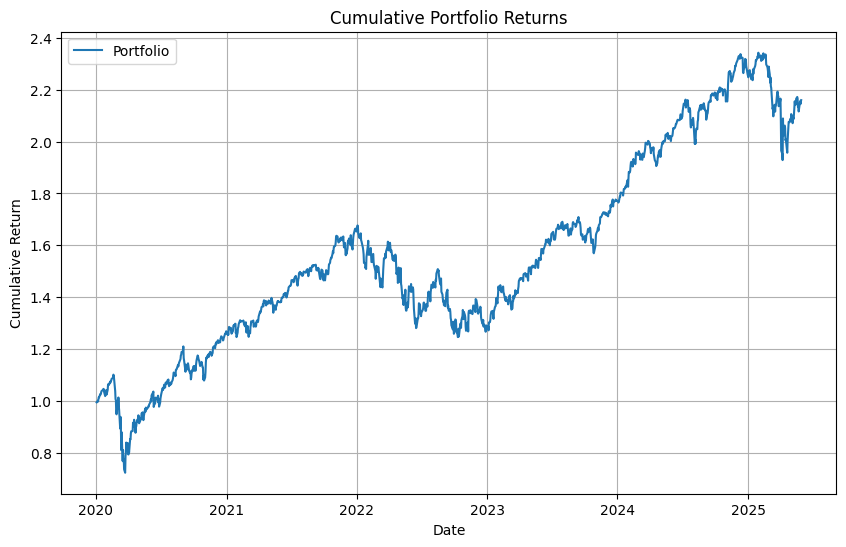

In [12]:
cumulative_returns = (1 + portfolio_returns).cumprod()
plt.figure(figsize=(10, 6))
plt.plot(cumulative_returns, label='Portfolio')
plt.title('Cumulative Portfolio Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()